# Seaborn
**seaborn** 은 matplotlib과 유사한 형태의 함수를 지원하면서 보기 좋은 그래프를 작성할 수 있도록 도와준다. 또한 맷플롯립을 기본으로 작성하기 때문에 사용자 입장에서도 사용하기 쉽다. 이번엔 seaborn에 대해 알아본다.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

##한글 폰트
plt.rc('font', family='NanumGothic') 
%matplotlib inline

## minus sign
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

---

### 1.seaborn의 기본
**seaborn**은 앞서 다른 matplotlib을 바탕으로 다양한 함수를 사용할 수 있도록 도와주는 일종의 **wrapper** 모듈이다. 따라서 결과물은 matplotlib과 동일하게 나오지만, 그래프를 만드는 과정과 코드 작성이 매우 간단하고 직관적이라는 장점이 있다. 다음과 같이 불러온다.

In [2]:
import seaborn as sns

가장 기본적인 코드로 판다스(pandas)의 데이터프레임을 활용하면 비교적 편하게 그래프를 작성할 수 있다. 다음 코드를 보면 기존 matplotlib에 비해 훨씬 간단하게 그래프를 작성할 수 있다는 것을 알 수 있다.

In [4]:
##예시 데이터셋(seaborn 제공 데이터셋)
df=sns.load_dataset('fmri')
df

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


<Axes: xlabel='timepoint', ylabel='signal'>

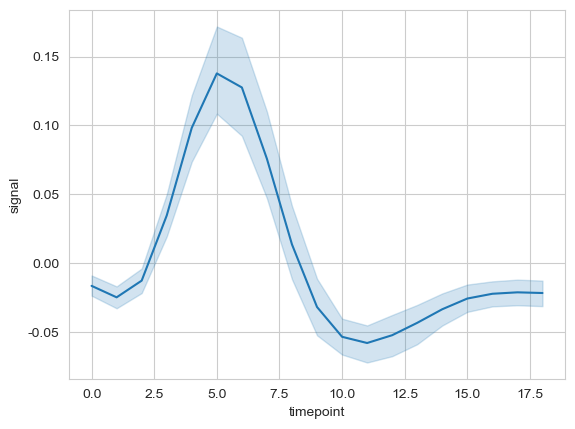

In [6]:
sns.set_style('whitegrid') #seaborn의 기본적인 스타일 지정, whitegrid는 하얀색 그리드 생성
sns.lineplot(x='timepoint',y='signal',data=df) #선그래프 작성, 매개변수 x와 y엔 각 열의 이름 입력하고 data에는 데이터프레임 객체 이름

seaborn은 matplotlib와 달리 그림(figure) 객체나 축(axes) 객체와 같은 복잡한 개념 없이 단순하게 그래프가 생성되는 것을 확인할 수 있다. 또한 xticks의 설정 없이도 각 축에 라벨이 자동으로 생성된다.  
예시 데이터셋은 연속형 변수 뿐만 아니라 다양한 범주형 변수도 존재하는데 matplotlib을 사용하면 복잡하게 표현해야 하지만 seaborn은 단순히 **hue** 라는 매개변수만 추가해도 꽤 그럴듯한 그래프를 작성할 수 있다.

데이터셋에서 event 열은 범주형 변수로 다른 데이터들과 구분할 때 사용이 가능하다. timepoint에 따른 signal 값을 선그래프로 보여주면서 event를 기준으로 구분해서 시각화하려면 hue 매개변수에 event를 입력하면 된다.

<Axes: xlabel='timepoint', ylabel='signal'>

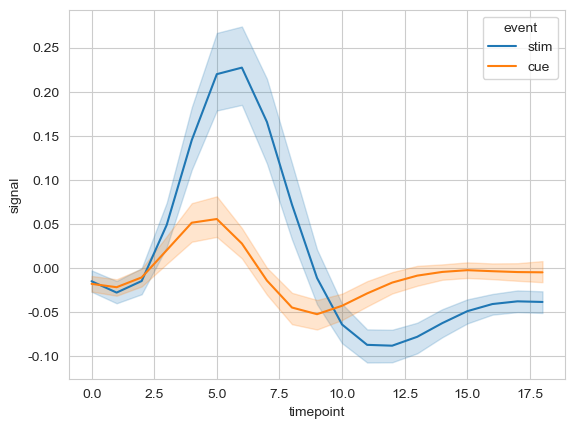

In [12]:
sns.lineplot(x='timepoint',y='signal',hue='event',data=df)

---

### 2.seaborn에서 사용하는 그래프
seaborn에서도 회귀 그래프, 산점도, 비교 그래프, 막대 그래프 등의 다양한 그래프를 사용할 수 있다.

#### 2-1.회귀 그래프(regression plot)
**회귀 그래프(regression plot)** 은 회귀식을 적용하여 선형 회귀 추세선을 그래프에 함께 작성한다. 매개변수로 x_ci가 있는데 회귀분석에서의 **confidence band**를 의미하며 유의수준을 지정하는 매개변수이다.

<Axes: xlabel='total_bill', ylabel='tip'>

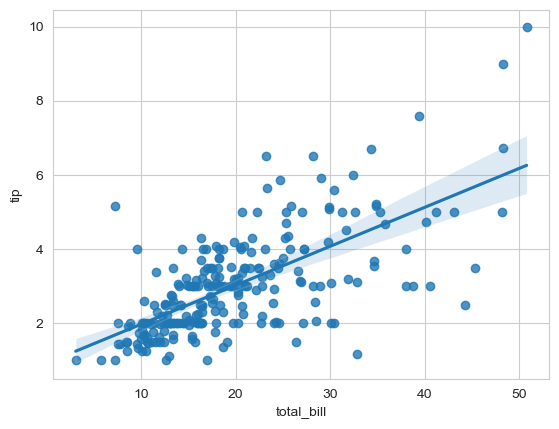

In [13]:
tips=sns.load_dataset('tips')
sns.regplot(x='total_bill',y='tip',data=tips,x_ci=95)

#### 2-2.산점도(scatterplot)
**산점도(scatterplot)** 는 x와 y를 기준으로 데이터의 분포를 표현하는 그래프이다. 함수로 scatterplot을 사용한다. 마찬가지로 hue를 사용하여 범주형 변수 별로 다르게 표현할 수 있다.

<Axes: xlabel='total_bill', ylabel='tip'>

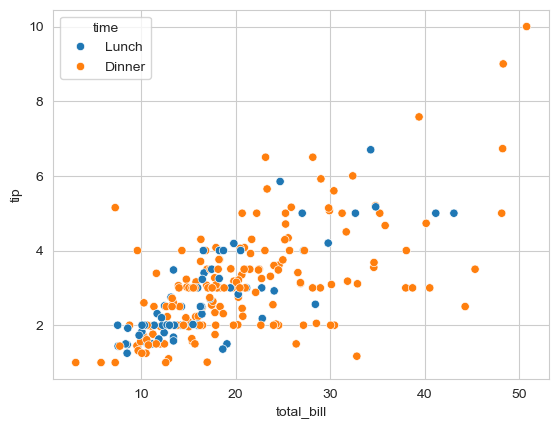

In [15]:
sns.scatterplot(x='total_bill',y='tip',hue='time',data=tips)

#### 2-3.비교 그래프(counter plot)
**비교 그래프(counter plot)** 은 일반적으로 범주형 데이터의 항목별 개수를 그래프로 표현하는 것이다. 데이터에서 smoker 열은 yes or no로 구성되어 있고 이에 대한 개수를 counterplot 함수를 사용하여 막대그래프 형태로 나타낼 것이다.  
기존 그래프와 차이가 있다면 y축이 데이터의 개수이기 때문에 별도로 y열을 지정할 필요가 없다. 

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='smoker', ylabel='count'>

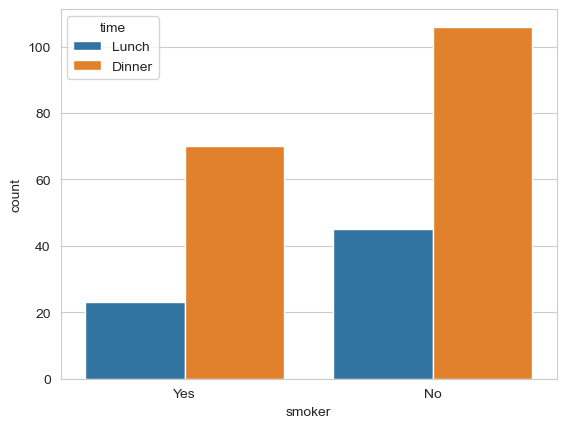

In [19]:
sns.countplot(x='smoker',hue='time',data=tips)

#### 2-4.막대그래프(bar plot)
seaborn의 **막대그래프** 는 barplot 함수를 사용하는데, 다소 특이한 형태로 그래프를 생성한다. 일반적인 막대그래프는 데이터의 개수를 표시하는 데 반해, seaborn의 막대그래프는 y값의 연속형 값인 경우 **해당 값들의 평균값** 을 나타낸다. 그래프 형태와 같이 해당 데이터이 신뢰구간을 검은색 막대로 표시한다.  
동일한 방법으로 **lineplot** 함수를 사용해도 데이터 평균값의 변화를 알 수 있다.

<Axes: xlabel='day', ylabel='total_bill'>

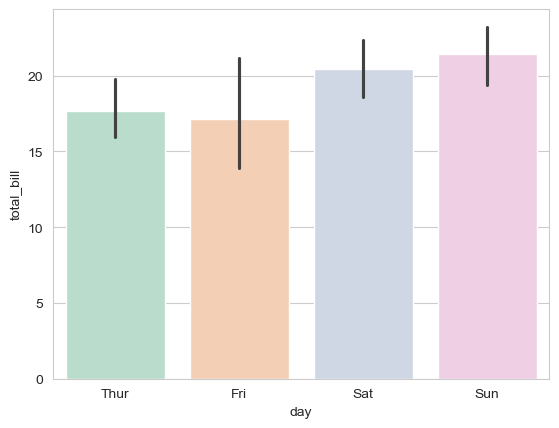

In [26]:
sns.barplot(x='day',y='total_bill',data=tips,palette='Pastel2')  ##palette는 색상을 지정하는 매개변수이며 하나씩 값을 부여해도 되고, matplotlib에 사전 정의된 색상 조합을 사용해도 된다.

---

### 3.사전 정의된 그래프
다음으로 seaborn에 사전 정의된 그래프들을 살펴본다. 사전 정의된 그래프는 matplotlib 관점에서 하나 이상의 그래프들을 합쳐서 다양한 정보를 줄 수 있는 그래프를 의미한다. 특히 범주형 데이터에서 매우 유용하게 쓸 수 있는 그래프들이 많다.

#### 3-1.분포를 나타내는 그래프 : 바이올린 플롯과 스웜 플롯
**바이올린 플롯(violin plot)** 은 데이터의 분포를 바이올린과 비슷한 형태로 보여주는 그래프로, 상자그림과 분포도를 한 번에 나타낼 수 있다. x축에는 범주형 데이터, y축에는 연속형 데이터를 넣어 사용한다.  
plot 안에 중앙값(흰 선)과 IQR(두꺼운 검은 선), 최소값과 최대값(IQR 밖의 범위)을 알 수 있으며 분포는 **KDE(kernel density estimation)** 을 통해 추정한다.

<Axes: xlabel='day', ylabel='total_bill'>

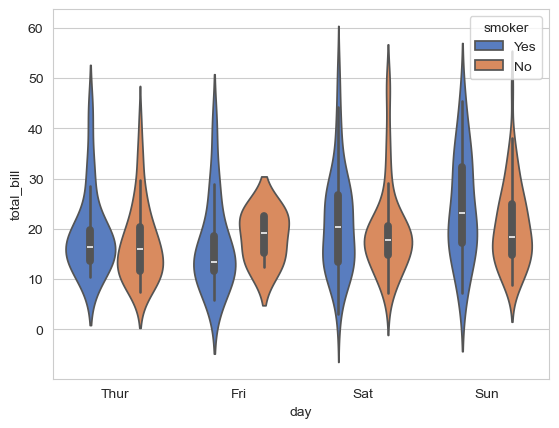

In [28]:
sns.violinplot(x='day',y='total_bill',hue='smoker',data=tips,palette='muted')

같은 형태로 **스웜 플롯(swarm plot)** 이 있다. 스웜플롯은 바이올린 플롯과 같은 형태이지만, 산점도를 이용해서 데이터의 분포를 나타낸다. 스웜 플롯은 매개변수 hue와 함께 사용하여 두 개 이상의 범주형 데이터를 비교할 때 데이터의 형태를 점이 겹치지 않게 정리하여 직관적으로 파악할 수 있게 도와준다.

<Axes: xlabel='day', ylabel='total_bill'>

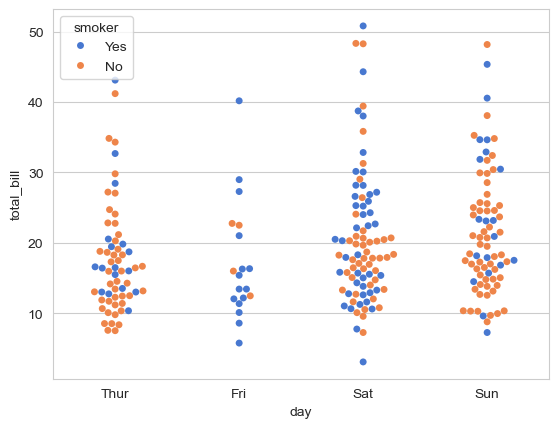

In [29]:
sns.swarmplot(x='day',y='total_bill',hue='smoker',data=tips,palette='muted')

#### 3-2.다양한 범주형 데이터를 나타내는 Facetgrid
seaborn에서는 맷플롭립과 달리 그래프의 틀만 제공하여 적당한 그래프를 그릴 수 있다. 이를 위해 **FacetGrid** 클래스를 사용한다. 이를 통해 범주형 데이터의 다양한 관점에서 전체 데이터를 나눠서 볼 수 있는 기능을 제공한다.  

다음 데이터셋을 보면 sex,smoker,day 등은 모두 범주형 데이터이다.

In [30]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


기본적인 데이터 표현 틀을 만들기 위한 코드는 다음과 같다. 매개변수 row와 col에 범주형 데이터를 넣으면 해당 열의 데이터 종류 만큼 m*n의 그래프 틀이 생성된다.  

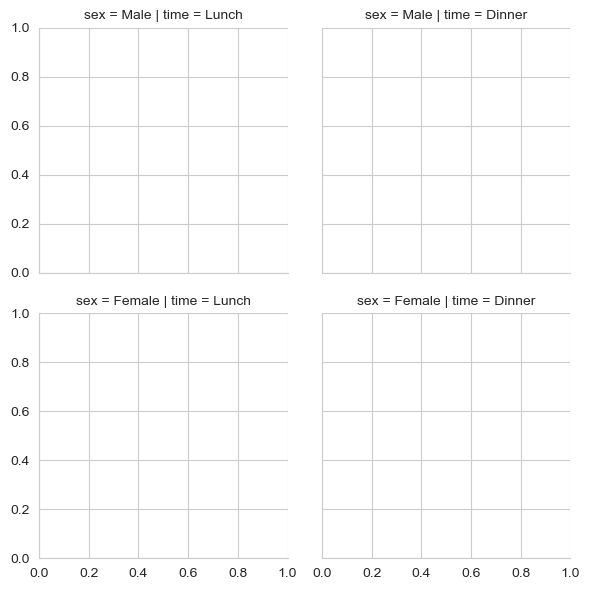

In [32]:
g=sns.FacetGrid(tips,col='time',row='sex')

그리드가 생성된 후 실제 그래프를 만들 때에는 일종의 맵(map) 개념을 사용한다. 즉, **생성된 그래프를 각 FacetGrid에 있는 개별 데이터 영역에 집어넣는 구조**로 되어 있다.  
다음 코드를 보면 time과 sex 내에 있는 범주형 데이터의 종류에 따라 데이터를 나눈 다음, scatterplot의 x축, y축에 total_bill과 tip 값을 대응시킨다.

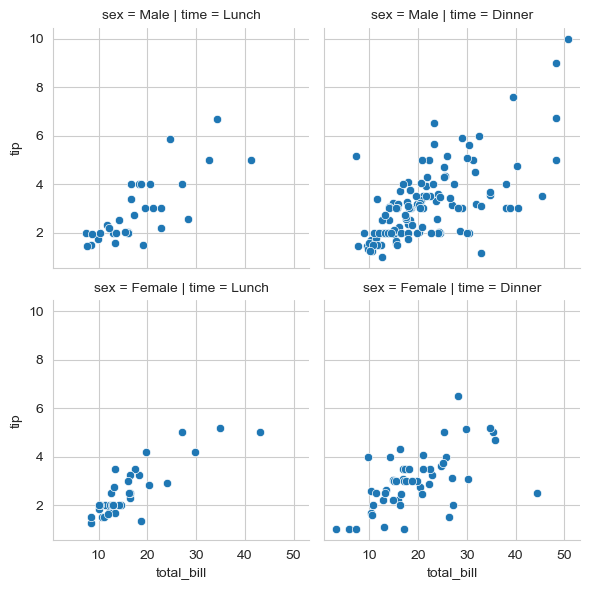

In [33]:
g=sns.FacetGrid(tips,col='time',row='sex')

g.map(sns.scatterplot,'total_bill','tip')

만약에 다른 그래프로 작성하고 싶다면, 다음 코드와 같이 **map_dataframe**을 사용하여 histplot 함수에 적절한 매개변수를 지정하여 데이터를 넘긴다.

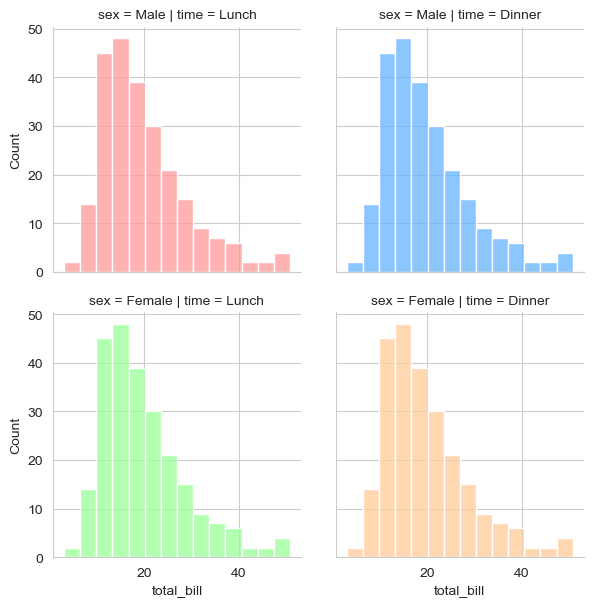

In [38]:
##색상 변경
g = sns.FacetGrid(tips, col='time', row='sex')
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

for ax, color in zip(g.axes.flat, colors):
    sns.histplot(data=tips, x='total_bill', ax=ax, color=color)

seaborn도 다양한 plot과 기능을 제공하므로 한번 들어가서 둘러보고 필요할 때 와서 어떤 시각화 기능을 사용할지 둘러보는 것도 나쁘지 않다.  
**seaborn** : https://seaborn.pydata.org/